In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

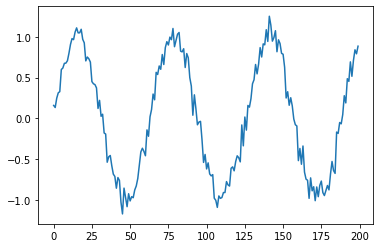

In [ ]:
#Creating the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1 # Creating a sine wave with noise

#plot it
plt.plot(series)
plt.show()

In [ ]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [ ]:
#Autoregressive Linear Model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))

#Train the RNN - The model trains on the first half of the dataset and validates on the second half

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[:-N//2], Y[:-N//2])
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
3/3 [==============================] - 1s 74ms/step - loss: 2.8096 - val_loss: 0.3055
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.5485 - val_loss: 1.1835
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 1.2012 - val_loss: 0.8405
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.5547 - val_loss: 0.1112
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1358 - val_loss: 0.2761
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.3468 - val_loss: 0.3677
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.2810 - val_loss: 0.1069
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0623 - val_loss: 0.0569
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0883 - val_loss: 0.1441
Epoch 10/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1283 - val_loss: 0.0740
Epoch 11/80
3/3 [============

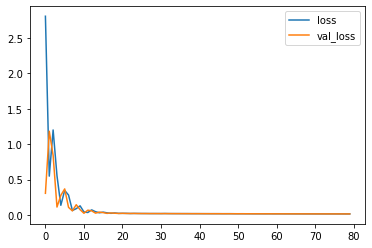

In [ ]:
#Plot for Loss Per Iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
#Forecasting Future Values using self-predictions

validation_target = Y[-N//2:] # this is the second half of Y
validation_predictions = [] # initialize validation predictions by creating an empty list

#Input Data - the last set of values of X will be the first input vector, thus ensuring that the new values wouldnt be taken from any of the previous input of x
last_x  = X[-N//2]

#create a while loop that loops until the validation_predictions is equal to the validation_target
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #we had to reshape the input while grabbing the output at index 0,0
  
  validation_predictions.append(p) #updating the validation_predictions list after every loop with p

  #making the new input to start from the last prediction, this is achieved by using the numpy function np.roll to shift all the previous input values to the left and then add latest prefiction to the end
  last_x = np.roll(last_x, -1) # shift all the values to the left by 1 place -achived by using -1
  last_x[-1] = p #the leftmost value after the shift will usually come to the front (or right) but it is replaced by the new value of p - our latest predictions

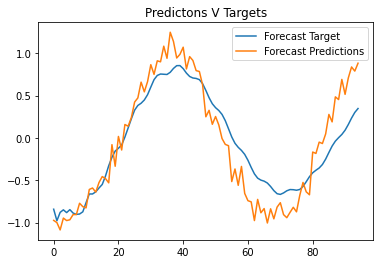

In [ ]:
#Plotting Our Predictons Against The Targets
plt.plot(validation_predictions, label = 'Forecast Target')
plt.plot(validation_target, label = 'Forecast Predictions')
plt.title("Predictons V Targets")
plt.legend()
plt.show()